# Social network exploration

This notebook starts from the output generated at step 4 (04_trades_featureEng.ipynb), building and exploring the network of buyers and sellers.

In [1]:
import numpy as np
import pandas as pd 
from scripts_network.network_analysis_exp import *
from scripts_network.network_bond_graph import *
from scripts_network.network_modelling import *
from scripts_network.network_visualization import *
from scripts_network.network_visualization import TTQcolor
from scripts_viz.visualization_utils import *
import networkx as nx
import seaborn as sns

from datetime import timedelta

from bokeh.io import show, output_notebook, output_file, save
from matplotlib import pyplot as plt

output_notebook()

Loading BokehJS ...

## Importing data

In [2]:
datafolder = "../data/"
filename = "02_instrumentsdf_2.pkl"

df = pd.read_pickle(datafolder+filename)

In [3]:
nodes = create_nodes_df(df)

In [4]:
nodes.head()

,Company_Name,ID,Type,Type_2
0,Castillo GmbH,'2004008',seller,seller
1,Orpheus Wyandotte Supply LLC,'2004009',seller,seller
2,Scripps Boa and Enstatites Sarl,'2004016',seller,seller
3,Beverly S.p.a.,'2004019',seller,seller
4,Eveready McCall LLC,'2004004',seller,seller


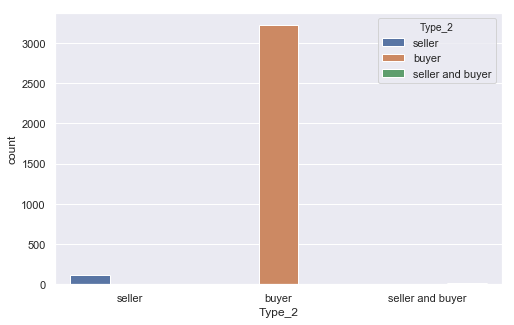

In [5]:
sns.set()
plt.figure(figsize=(8,5))
sns.countplot(nodes.Type_2, hue=nodes.Type_2)

In [6]:
sum(nodes.Type_2=='seller and buyer')

15

In [7]:
nodes.shape

(3349, 4)

In [8]:
edges = create_edges_df(df, fields=['is_pastdue90', 'is_pastdue180', 'has_impairment1'])

In [9]:
edges.head()

,xs,ys,edges_couples,is_pastdue90,is_pastdue180,has_impairment1
0,Sana Hyannis Sarl,Castillo GmbH,"(Sana Hyannis Sarl, Castillo GmbH)",False,False,False
1,Isfahan SA,Orpheus Wyandotte Supply LLC,"(Isfahan SA, Orpheus Wyandotte Supply LLC)",False,False,False
2,Aldrich Chloe GmbH,Orpheus Wyandotte Supply LLC,"(Aldrich Chloe GmbH, Orpheus Wyandotte Supply ...",True,True,False
3,Haddad Corporation,Castillo GmbH,"(Haddad Corporation, Castillo GmbH)",False,False,False
4,Bertram Concatenates S.p.a.,Orpheus Wyandotte Supply LLC,"(Bertram Concatenates S.p.a., Orpheus Wyandott...",False,False,False


In [10]:
edges.shape

(3788, 6)

In [11]:
graph, edges, nodes = create_network(edges, nodes, R=0.65, nperlayer=40, nodescircles=0.045)

In [12]:
nodes[nodes.Type_2=='seller and buyer']

,Company_Name,ID,Type,Type_2,centrality,size,coords
3334,Cooperative Inventors Corporation,'2004022',seller,seller and buyer,0.036440,9.20,"[0.22920664418391665, -0.01908701815233255]"
3335,Remington Muskegon Corporation,'che2004009',seller,seller and buyer,0.001792,6.13,"[0.659830457716738, -0.8423323376609257]"
3336,McKesson Gumptia Inc.,'2004020',seller,seller and buyer,0.031661,8.78,"[0.07785371866650564, -0.21642273099144793]"
3337,Telex Inc.,'2004029',seller,seller and buyer,0.001792,6.13,"[-1.0556882266391907, 0.17442009097406366]"
3338,Johansen Wilhelmina Sarl,'2004033',seller,seller and buyer,0.003883,6.32,"[-0.39636003692911476, 0.6833730468240248]"
3339,Alva Apprentices and Pigeonberries SA,'2004032',seller,seller and buyer,0.002688,6.21,"[-0.08101459297061195, -0.7858349926834552]"
3340,Universal Societies Ltd,'2004041',seller,seller and buyer,0.002091,6.16,"[0.20294884558546814, 0.7634865853933033]"
3341,DARPA Elijah Co.,'2004046',seller,seller and buyer,0.002987,6.24,"[0.6634042498675617, -0.42894615193245156]"
3342,Katharine Corporation,'2004063',seller,seller and buyer,0.000597,6.03,"[1.0440090732708618, -0.23440361543311533]"
3343,Tananarive Flintlocks Inc.,'2004055',seller,seller and buyer,0.007766,6.66,"[-0.34647923388162266, 0.3742354078501977]"


In [13]:
g_viz = visualize_graph(graph, edges, nodes, plot_h=1200, plot_w=1200, #to_highlight='is_pastdue90',
                       circularLayout=True, nx_k=0.025, nx_iterations=30,
                       nodes_colors = [TTQcolor['sky'], TTQcolor['richBrown'], TTQcolor['marketplaceOrange']])

#output_file('../data/viz_data/graph_spring.html')
#save(g_viz)

show(g_viz)

In [14]:
#defining edges attributes
edge_attr = ['currency', 'invoice_date', 'invoice_amount',
        'is_due', 'due_date',
        'value_date', 'has_purchase', 'has_impairment1', 'is_pastdue90',
            'is_pastdue180']

In [15]:
#multi digraph
g = nx.from_pandas_edgelist(df,
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.MultiDiGraph)

In [16]:
#flat graph (without duplicate edges)
g_flat = nx.from_pandas_edgelist(df,
                                 source='debtor_name_1',
                                 target='customer_name_1',
                                 create_using=nx.DiGraph)

In [17]:
sorted_components = sorted([(len(component),component) for component in nx.connected_components(g_flat.to_undirected())], key=lambda x: x[0], reverse=True)

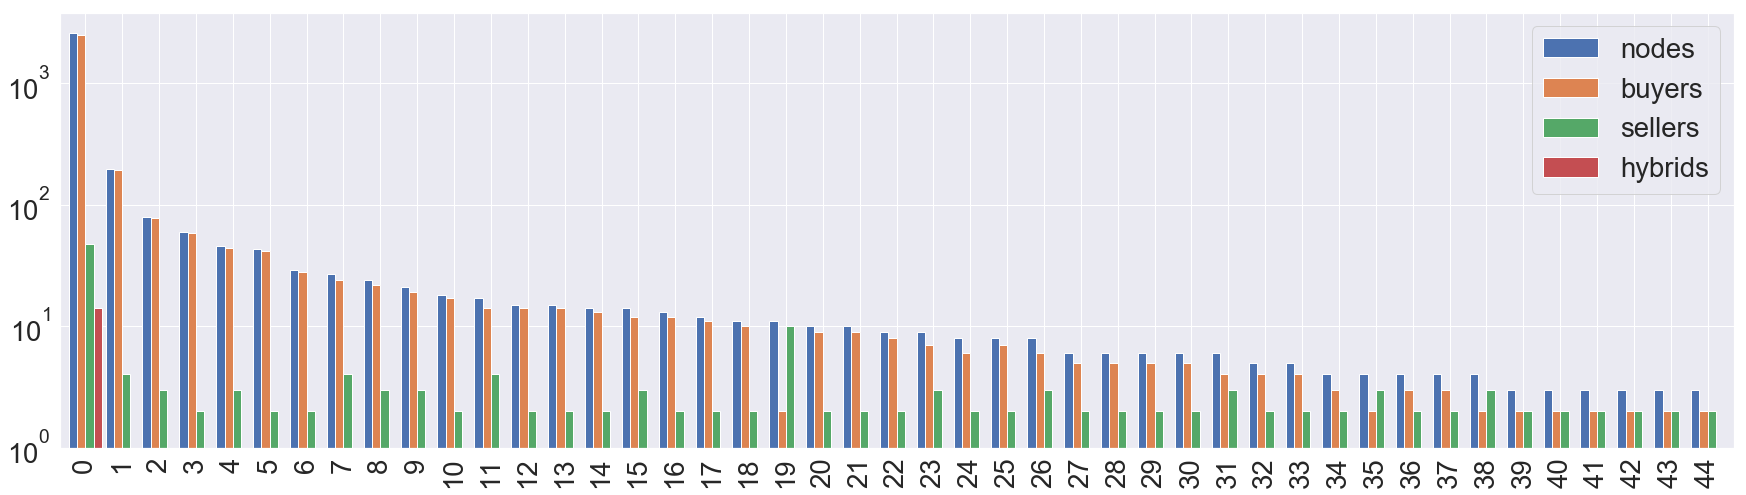

In [18]:
sns.set(font_scale=2.5)
comp_df = pd.DataFrame(list(zip(range(len(sorted_components)), pd.Series(sorted_components).apply(lambda x:x[0]))), columns=['component', 'nodes'])

buyers_no = []
sellers_no = []
hybrids_no = []

for c in sorted_components:
    buyers_no.append(len(c[1].intersection(set(nodes.loc[(nodes.Company_Name.isin(list(c[1]))) & (nodes.Type_2=='buyer'), 'Company_Name'].unique()))))
    sellers_no.append(len(c[1].intersection(set(nodes.loc[(nodes.Company_Name.isin(list(c[1]))) & (nodes.Type_2=='seller'), 'Company_Name'].unique()))))
    hybrids_no.append(len(c[1].intersection(set(nodes.loc[(nodes.Company_Name.isin(list(c[1]))) & (nodes.Type_2=='seller and buyer'), 'Company_Name'].unique()))))
    

comp_df['buyers'] = buyers_no
comp_df['sellers'] = sellers_no
comp_df['hybrids'] = hybrids_no

comp_df['buyers_ratio'] = comp_df.buyers/comp_df.buyers.sum()
comp_df['sellers_ratio'] = comp_df.sellers/comp_df.sellers.sum()
comp_df['hybrids_ratio'] = comp_df.hybrids/comp_df.hybrids.sum()
comp_df['nodes_ratio'] = comp_df.nodes/comp_df.nodes.sum()

comp_df[['nodes', 'buyers', 'sellers', 'hybrids']].plot.bar(figsize=(30,8), width=0.9,log=True)

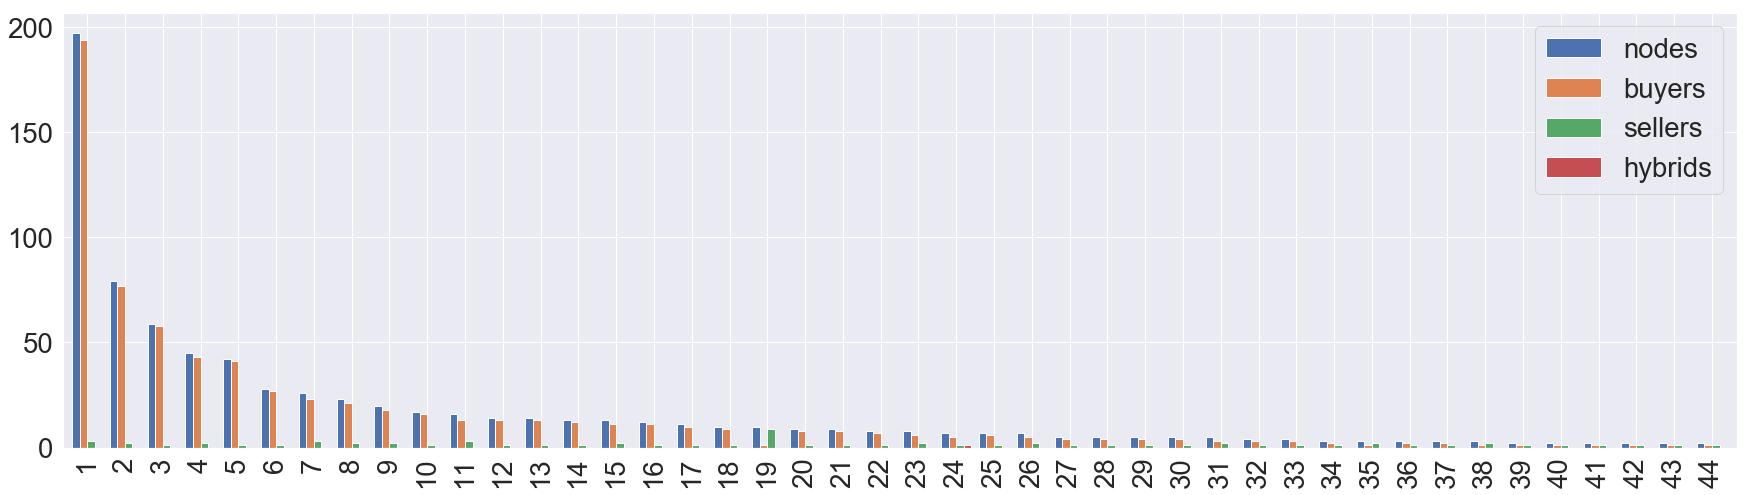

In [19]:
#smaller components overview
comp_df.loc[comp_df.component>0, ['nodes', 'buyers', 'sellers', 'hybrids']].plot.bar(figsize=(30,8), width=0.8)

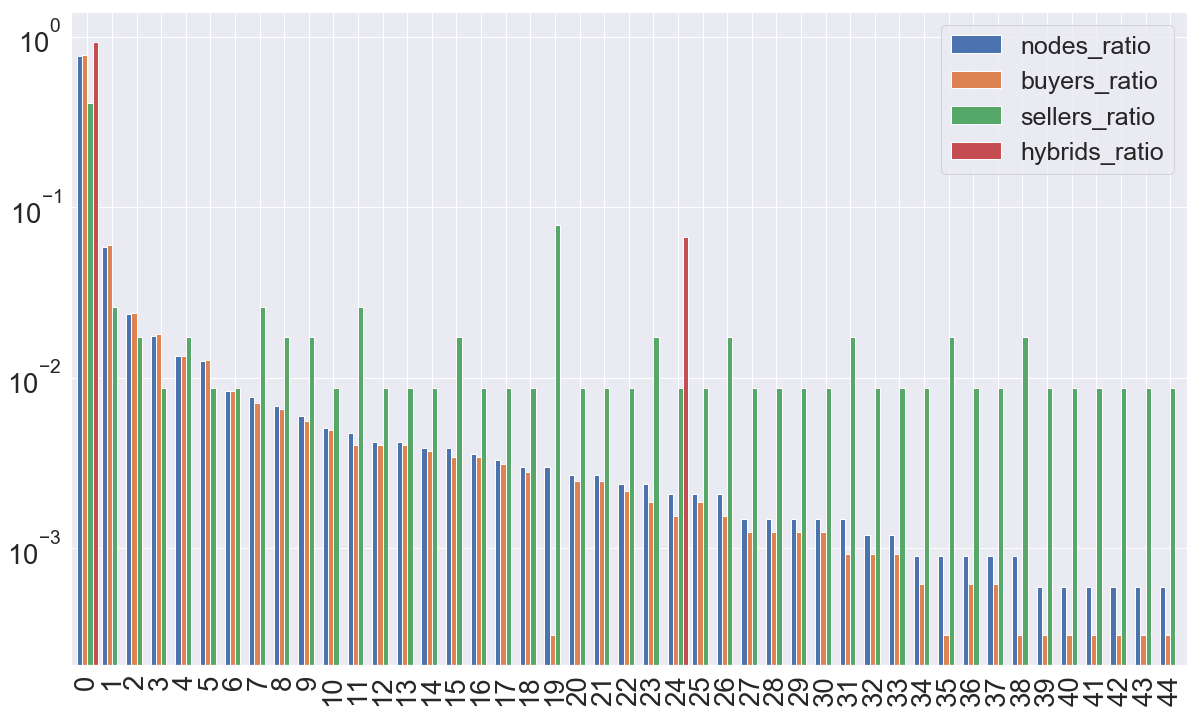

In [20]:
ratio_comp = comp_df[['nodes_ratio', 'buyers_ratio', 'sellers_ratio', 'hybrids_ratio']].plot.bar(figsize=(20,12), width=0.85, log=True)
ratio_comp.legend(loc=0, prop={'size': 25})

In [21]:
pd.set_option('display.max_columns', 50)
comp_df[['nodes_ratio', 'buyers_ratio', 'sellers_ratio', 'hybrids_ratio']].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
nodes_ratio,0.771872,0.058824,0.023589,0.017617,0.013437,0.012541,0.008361,0.007764,0.006868,0.005972,0.005076,0.004778,0.004180,0.004180,0.003882,0.003882,0.003583,0.003285,0.002986,0.002986,0.002687,0.002687,0.002389,0.002389,0.002090,0.002090,0.002090,0.001493,0.001493,0.001493,0.001493,0.001493,0.001194,0.001194,0.000896,0.000896,0.000896,0.000896,0.000896,0.000597,0.000597,0.000597,0.000597,0.000597,0.000597
buyers_ratio,0.784094,0.060267,0.023920,0.018018,0.013358,0.012737,0.008388,0.007145,0.006524,0.005592,0.004970,0.004039,0.004039,0.004039,0.003728,0.003417,0.003417,0.003107,0.002796,0.000311,0.002485,0.002485,0.002175,0.001864,0.001553,0.001864,0.001553,0.001243,0.001243,0.001243,0.001243,0.000932,0.000932,0.000932,0.000621,0.000311,0.000621,0.000621,0.000311,0.000311,0.000311,0.000311,0.000311,0.000311,0.000311
sellers_ratio,0.408696,0.026087,0.017391,0.008696,0.017391,0.008696,0.008696,0.026087,0.017391,0.017391,0.008696,0.026087,0.008696,0.008696,0.008696,0.017391,0.008696,0.008696,0.008696,0.078261,0.008696,0.008696,0.008696,0.017391,0.008696,0.008696,0.017391,0.008696,0.008696,0.008696,0.008696,0.017391,0.008696,0.008696,0.008696,0.017391,0.008696,0.008696,0.017391,0.008696,0.008696,0.008696,0.008696,0.008696,0.008696
hybrids_ratio,0.933333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
pd.set_option('display.max_columns', 50)
comp_df[['nodes', 'buyers', 'sellers', 'hybrids']].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
nodes,2585,197,79,59,45,42,28,26,23,20,17,16,14,14,13,13,12,11,10,10,9,9,8,8,7,7,7,5,5,5,5,5,4,4,3,3,3,3,3,2,2,2,2,2,2
buyers,2524,194,77,58,43,41,27,23,21,18,16,13,13,13,12,11,11,10,9,1,8,8,7,6,5,6,5,4,4,4,4,3,3,3,2,1,2,2,1,1,1,1,1,1,1
sellers,47,3,2,1,2,1,1,3,2,2,1,3,1,1,1,2,1,1,1,9,1,1,1,2,1,1,2,1,1,1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1
hybrids,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Network evolution

In [23]:
giant_component = g.subgraph(nodes=sorted_components[0][1])

In [24]:
giant_component_flat = g_flat.subgraph(nodes=sorted_components[0][1])

In [25]:
#considering the giant component only
df = df[df.debtor_name_1.isin(list(giant_component.nodes)) | df.customer_name_1.isin(list(giant_component.nodes))]

In [26]:
pastdue_col = 'is_pastdue90'
past_due_nodes = df[df[pastdue_col]==True]['debtor_name_1'].unique()

In [27]:
first_invoice_date = df['invoice_date'].min()
last_invoice_date = df['invoice_date'].max()
print('{0} - {1}'.format(first_invoice_date,last_invoice_date))

2013-07-23 00:00:00 - 2018-12-18 00:00:00


In [28]:
def get_time_window(row):
    return dates_linspace[np.argmax([row['invoice_date'] <= date for date in dates_linspace])]

In [29]:
num_days = (last_invoice_date-first_invoice_date).days
days_linspace = reversed(np.linspace(start=num_days, stop=0,num=100,endpoint=False, dtype=int))
dates_linspace = [first_invoice_date + timedelta(days=int(x)) for x in days_linspace]

df['invoice_date_window'] = df.apply(get_time_window,axis=1)
debtors = df['debtor_name_1'].unique()

In [30]:
#number of nodes in each time window
num_nodes_window = [nx.from_pandas_edgelist(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.Graph).number_of_nodes() for date_index, date in enumerate(dates_linspace[1:])]

In [31]:
#number of buyers in each time window
num_debtor_window = [len(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].debtor_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [32]:
#number of sellers in each time window
num_customer_window = [len(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].customer_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [33]:
#progressive number of nodes in each window
cum_num_nodes_window = [nx.from_pandas_edgelist(df[(df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.Graph).number_of_nodes() for date_index, date in enumerate(dates_linspace[1:])]

In [34]:
#progressive number of buyers in each window
cum_num_debtor_window = [len(df[(df.invoice_date<date)].debtor_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [35]:
#progressive number of sellers in each window
cum_num_customer_window = [len(df[(df.invoice_date<date)].customer_name_1.unique()) for date_index, date in enumerate(dates_linspace[1:])]

In [36]:
#number of transactions in each window
num_transactions_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [37]:
#number of pastdue90 transactions in each window
num_pastdue90_transactions_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df[pastdue_col]==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [38]:
#number of pastdue180 transactions in each window
num_pastdue180_transactions_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df['is_pastdue180']==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [39]:
#number of impairment1 transactions in each window
num_impairment_transactions_window = [df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date) &
        (df['has_impairment1']==True)].shape[0] for date_index, date in enumerate(dates_linspace[1:])]

In [40]:
windows_df = pd.DataFrame({'active_nodes':num_nodes_window, 'active_buyers':num_debtor_window, 'active_sellers':num_customer_window,
                          'total_nodes':cum_num_nodes_window, 'total_buyer': cum_num_debtor_window,
                         'total_seller':cum_num_customer_window, 'new_transactions':num_transactions_window,
                          'new_pastdue90':num_pastdue90_transactions_window, 'new_pastdue180':num_pastdue180_transactions_window,
                          'new_impairment1':num_impairment_transactions_window,
                          'time':dates_linspace[1:]})
windows_df.index = windows_df.index.map(str)

In [41]:
TTQcolor.keys()

dict_keys(['font', 'lightGrey', 'borderColour', 'cream', 'lightCream', 'background', 'link', 'brightLink', 'marketplaceOrange', 'warningRed', 'Salmon', 'victorian', 'whiteGrey', 'eightyGrey', 'blueGrey', 'sixtyGrey', 'navy', 'darkPurple', 'darkNavy', 'darkCyan', 'redBrown', 'richBrown', 'algae', 'mutedBlue', 'azureBlue', 'electric', 'sky', 'turq', 'pea', 'ocean', 'richOrange', 'richPeach', 'yell', 'yellowOrange', 'peach', 'bloodRed', 'PPTbg'])

In [42]:
new_actives = timeSeries(windows_df[['active_nodes', 'active_buyers', 'active_sellers']].transpose(), title='', 
                         colors=[TTQcolor['sky'], TTQcolor['richBrown'], TTQcolor['marketplaceOrange']],
          legend_names=['active_nodes', 'active_buyers', 'active_sellers']) #, output_file_name='../data/viz_data/new_actives_ts.html')

show(new_actives)

In [43]:
new_actives = timeSeries(windows_df[['total_nodes', 'total_buyer','total_seller']].transpose(), title='', 
                         colors=[TTQcolor['sky'], TTQcolor['richBrown'], TTQcolor['marketplaceOrange']],
          legend_names=['total_nodes', 'total_buyers', 'total_sellers'])#, output_file_name='../data/viz_data/total_actives_ts.html')

show(new_actives)

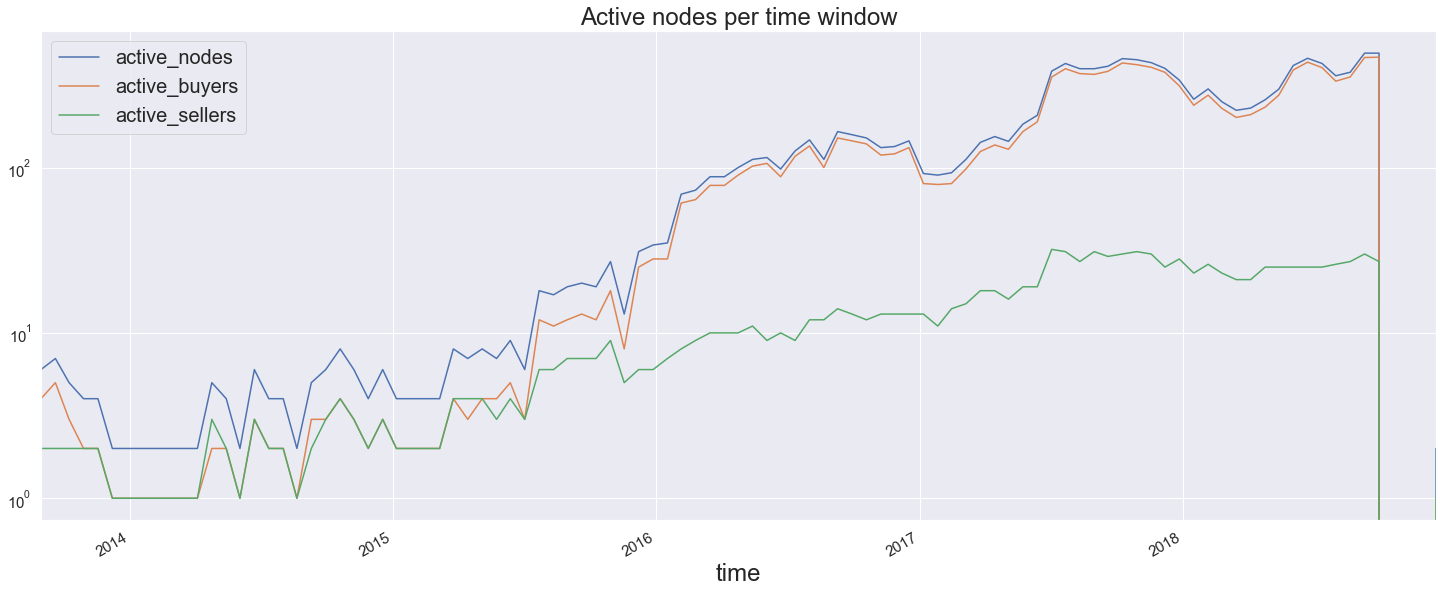

In [44]:
sns.set(font_scale=2)
new_actives = windows_df[['active_nodes', 'active_buyers', 'active_sellers', 'time']].plot(y=['active_nodes', 'active_buyers', 'active_sellers'],
                                                                                         x='time',figsize=(25,10), fontsize=15, logy=True,
                                                                                                      title='Active nodes per time window')
new_actives.legend(loc=0, prop={'size': 20})

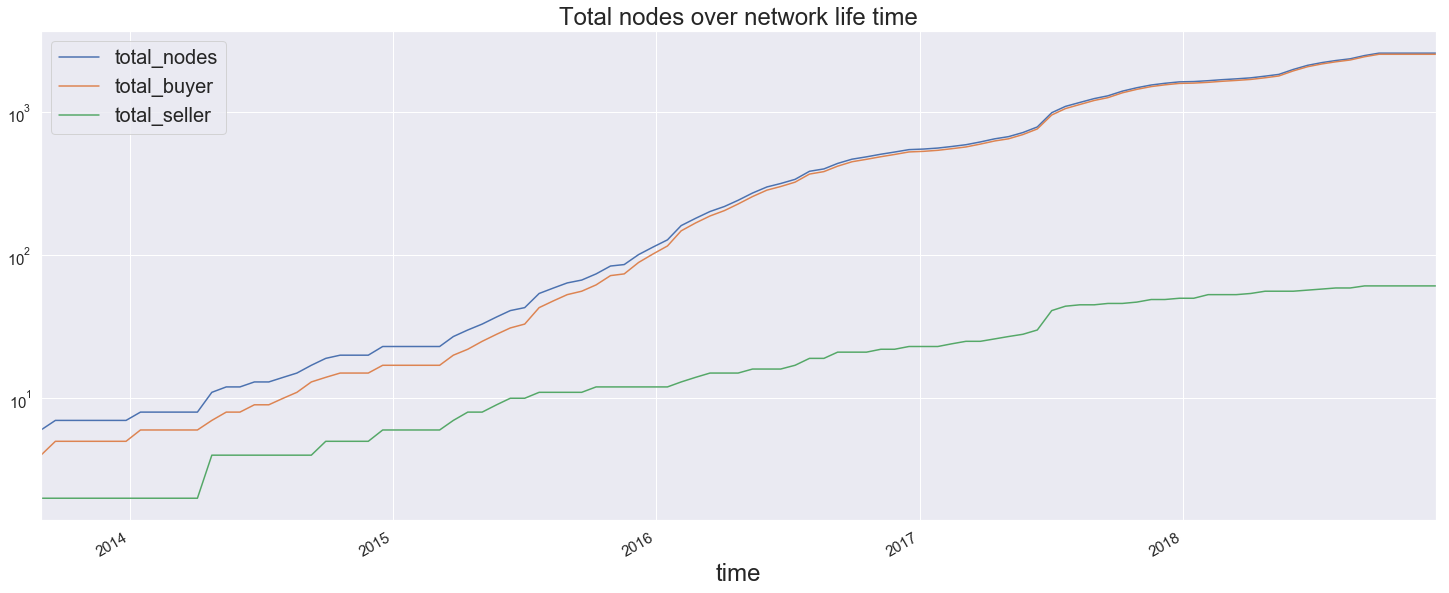

In [45]:
sns.set(font_scale=2)
new_actives = windows_df[['total_nodes', 'total_buyer', 'total_seller', 'time']].plot(y=['total_nodes', 'total_buyer', 'total_seller'],
                                                                                         x='time',figsize=(25,10), fontsize=15, title='Total nodes over network life time',logy=True)
new_actives.legend(loc=0, prop={'size': 20})

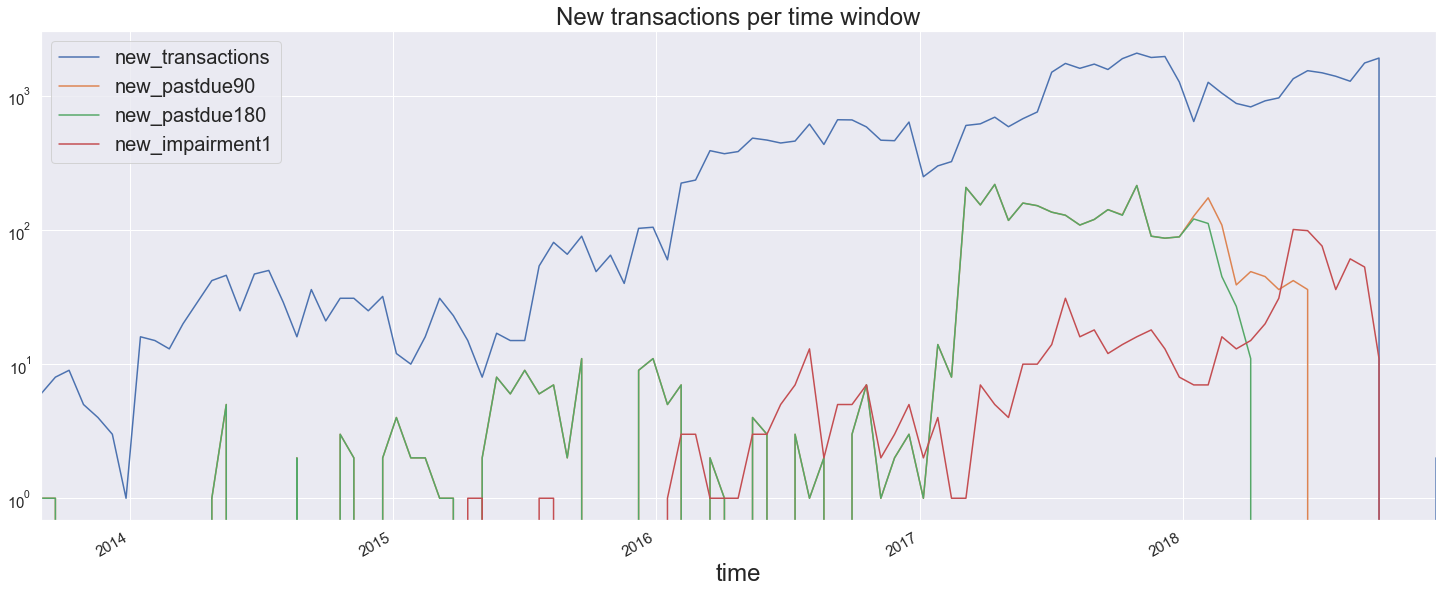

In [46]:
sns.set(font_scale=2)
new_actives = windows_df[['new_transactions','new_pastdue90', 'new_pastdue180','new_impairment1', 'time']].plot(y=['new_transactions','new_pastdue90', 'new_pastdue180','new_impairment1'],
                                                                                         x='time',figsize=(25,10), fontsize=15, title='New transactions per time window',logy=True)
new_actives.legend(loc=0, prop={'size': 20})

In [47]:
windows_df['non_active_nodes'] = windows_df.total_nodes-windows_df.active_nodes
windows_df['non_active_buyers'] = windows_df.total_buyer-windows_df.active_buyers
windows_df['non_active_sellers'] = windows_df.total_seller-windows_df.active_sellers

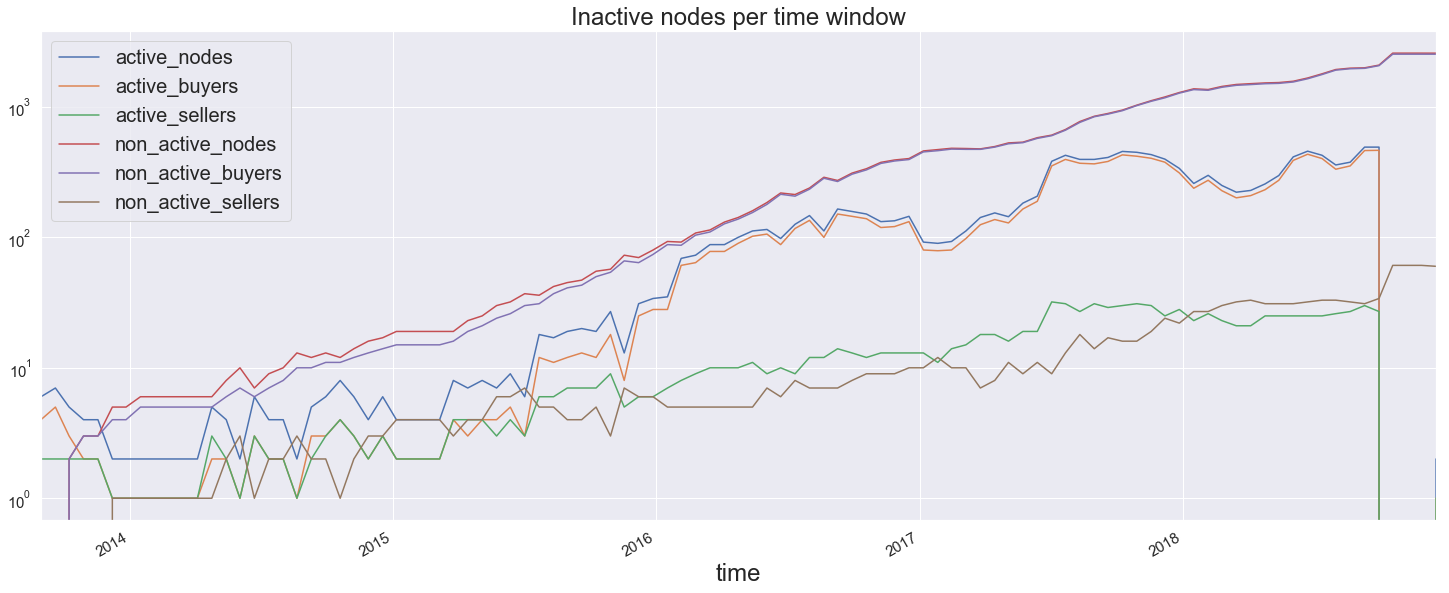

In [48]:
sns.set(font_scale=2)
new_actives = windows_df[['active_nodes', 'active_buyers', 'active_sellers',
                          'non_active_nodes', 'non_active_buyers', 'non_active_sellers', 'time']].plot(y=['active_nodes', 'active_buyers', 'active_sellers',
                                                                                                          'non_active_nodes', 'non_active_buyers', 'non_active_sellers'],
                                                                                         x='time',figsize=(25,10), fontsize=15, title='Inactive nodes per time window',logy=True)
new_actives.legend(loc=0, prop={'size': 20})

In [49]:
TTQcolor.keys()

dict_keys(['font', 'lightGrey', 'borderColour', 'cream', 'lightCream', 'background', 'link', 'brightLink', 'marketplaceOrange', 'warningRed', 'Salmon', 'victorian', 'whiteGrey', 'eightyGrey', 'blueGrey', 'sixtyGrey', 'navy', 'darkPurple', 'darkNavy', 'darkCyan', 'redBrown', 'richBrown', 'algae', 'mutedBlue', 'azureBlue', 'electric', 'sky', 'turq', 'pea', 'ocean', 'richOrange', 'richPeach', 'yell', 'yellowOrange', 'peach', 'bloodRed', 'PPTbg'])

In [50]:
stacked_windows_df = windows_df[['active_buyers', 'active_sellers',
                              'non_active_buyers', 'non_active_sellers']].copy()

stacked_windows_df.index = [s.split(' ')[0] for s in windows_df.time.map(str)]

In [51]:
show(stackedChart(stacked_windows_df.transpose(), xaxislabel='Date', xaxislabelorient=np.pi/2,
                  plot_w=1400, plot_h=600,
                  colors=[TTQcolor['richPeach'], TTQcolor['redBrown'],
                         TTQcolor['yell'], TTQcolor['warningRed']]))

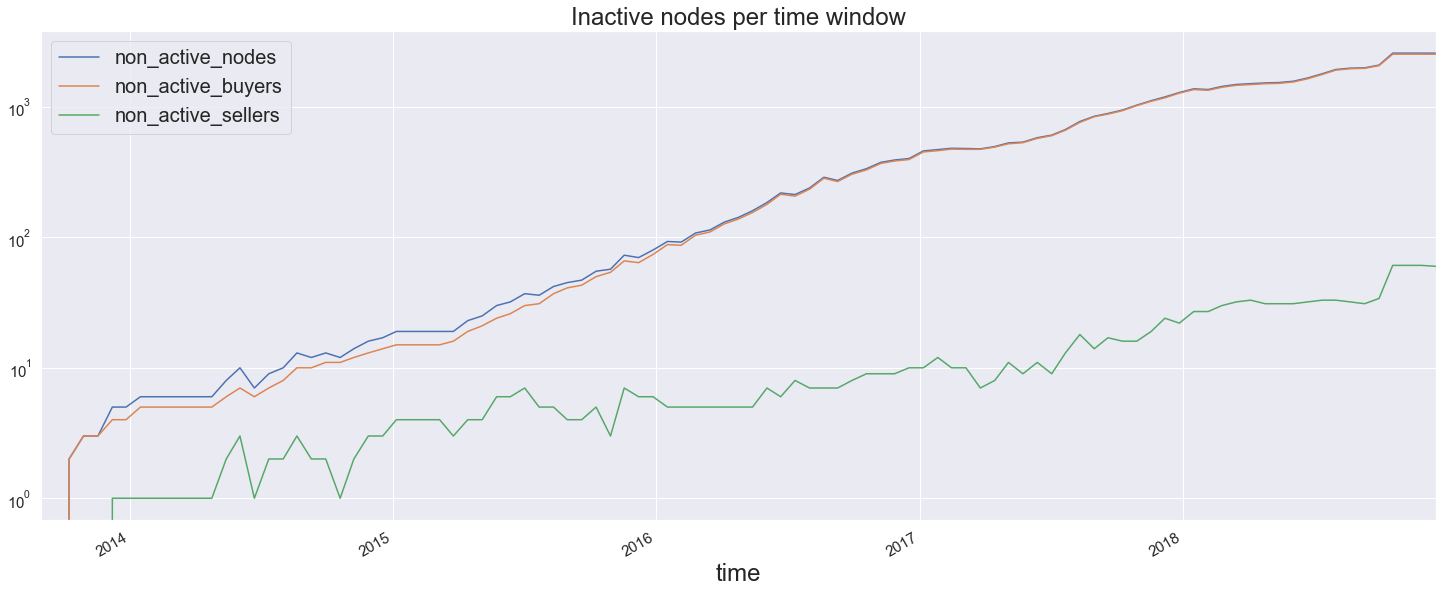

In [52]:
sns.set(font_scale=2)
new_actives = windows_df[['non_active_nodes', 'non_active_buyers', 'non_active_sellers', 'time']].plot(y=['non_active_nodes', 'non_active_buyers', 'non_active_sellers'],
                                                                                         x='time',figsize=(25,10), fontsize=15, title='Inactive nodes per time window',logy=True)
new_actives.legend(loc=0, prop={'size': 20})

In [53]:
#fig,axes = plt.subplots(1, 3, figsize=(35,6))
#axes[0].plot(dates_linspace[1:], num_nodes_window, label='All nodes')
#axes[0].plot(dates_linspace[1:], num_debtor_window, label='Debtors')
#axes[0].plot(dates_linspace[1:], num_customer_window, label='Customers')
#axes[0].legend()
#axes[0].set_yscale("log", nonposy='clip')
#axes[0].set_title('Number of unique nodes in each window')
#axes[1].plot(dates_linspace[1:], cum_num_nodes_window, label='All nodes')
#axes[1].plot(dates_linspace[1:], cum_num_debtor_window, label='Debtors')
#axes[1].plot(dates_linspace[1:], cum_num_customer_window, label='Customers')
#axes[1].set_yscale("log", nonposy='clip')
#axes[1].legend()
#axes[1].set_title('Cumulative number of unique nodes in the network')
#axes[2].plot(dates_linspace[1:], num_transactions_window, label='All transactions')
#axes[2].plot(dates_linspace[1:], num_pastdue90_transactions_window, label='pastdue_90 transactions')
#axes[2].plot(dates_linspace[1:], num_pastdue180_transactions_window, label='pastdue_180 transactions')
#axes[2].legend()
#axes[2].set_yscale("log", nonposy='clip')
#axes[2].set_title('Number of transactions in each window')
#plt.show()

C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


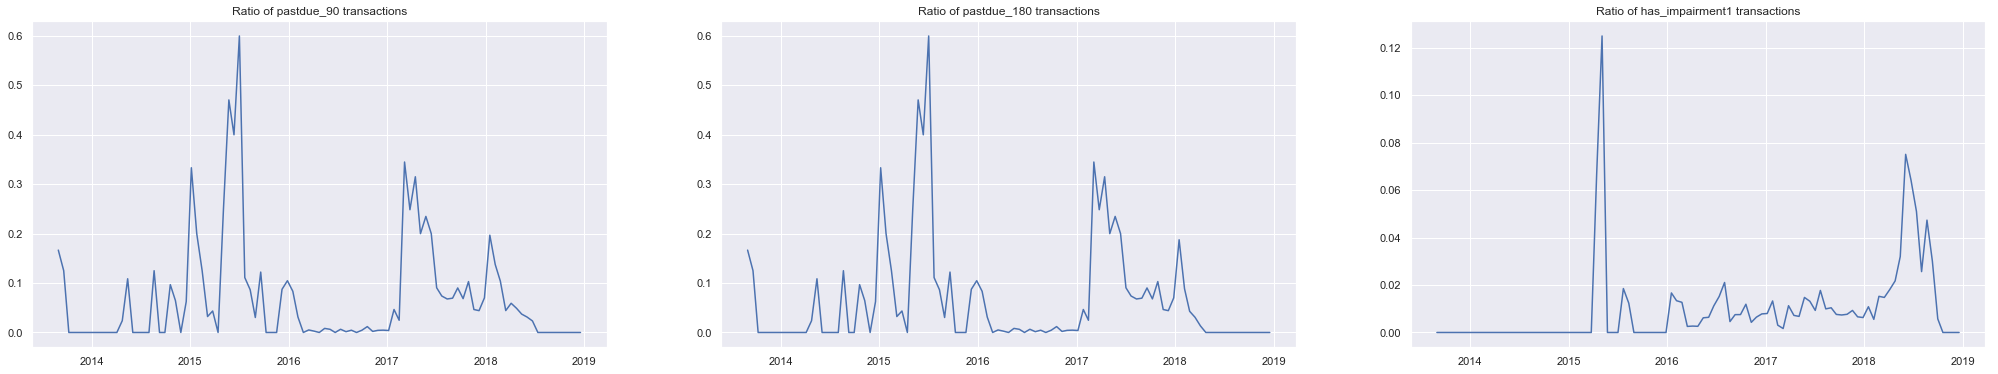

In [56]:
sns.set()
fig,axes = plt.subplots(1, 3, figsize=(35,6))
axes[0].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_pastdue90_transactions_window,num_transactions_window)))
axes[0].set_title('Ratio of pastdue_90 transactions')
axes[1].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_pastdue180_transactions_window,num_transactions_window)))
axes[1].set_title('Ratio of pastdue_180 transactions')
axes[2].plot(dates_linspace[1:],np.nan_to_num(np.divide(num_impairment_transactions_window,num_transactions_window)))
axes[2].set_title('Ratio of has_impairment1 transactions')
plt.show()

In [ ]:
print('Number of hybrid nodes -',len(np.intersect1d(df.debtor_name_1.unique(),df.customer_name_1.unique())))

## Transaction amounts in time

In [36]:
group_invoice_date_window = df.groupby(by=['debtor_name_1','invoice_date_window']).sum()['invoice_amount']

In [37]:
 flow_array = np.empty([len(debtors),len(dates_linspace)])
for debtor_key, debtor in enumerate(debtors):
    for time_window_key, time_window in enumerate(dates_linspace):
        try:
            flow_array[debtor_key, time_window_key] = group_invoice_date_window.loc[debtor].loc[time_window]
        except:
            flow_array[debtor_key, time_window_key] = 0

In [38]:
 row_max = flow_array.max(axis=1)
flow_array = flow_array / row_max[:, np.newaxis]

Text(0.5,1,'All debtors')

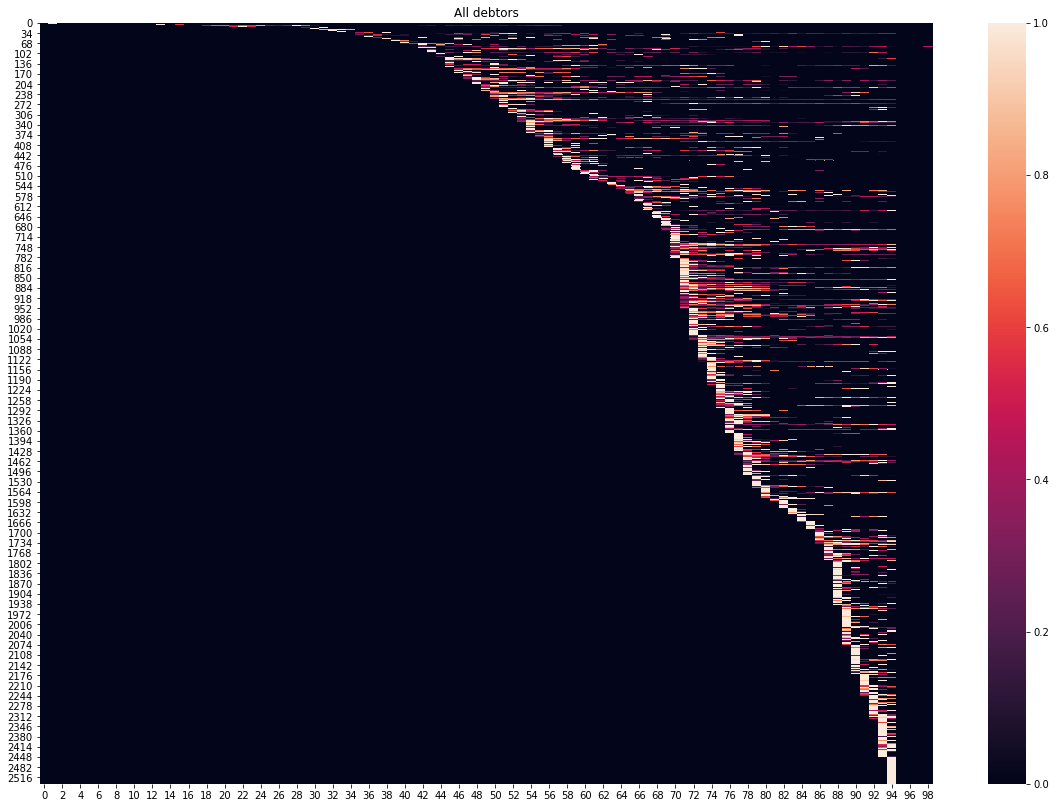

In [39]:
plt.figure(figsize=(20,14))
sns.heatmap(flow_array)
plt.title('All debtors')

In [40]:
print("Debotrs on Y-axis, time-windows on X-axis (approx 2.5 week). Normalised per row. black is no transactions. white - maximum sum-value per debtor")

Debotrs on Y-axis, time-windows on X-axis (approx 2.5 week). Normalised per row. black is no transactions. white - maximum sum-value per debtor


In [41]:
 y = np.bincount(np.where(flow_array!=0)[0])

In [42]:
 y = y-1

In [43]:
 ii = np.nonzero(y)[0]

Text(0.5,1,'Debotrs with more than 1 time-window with transactions')

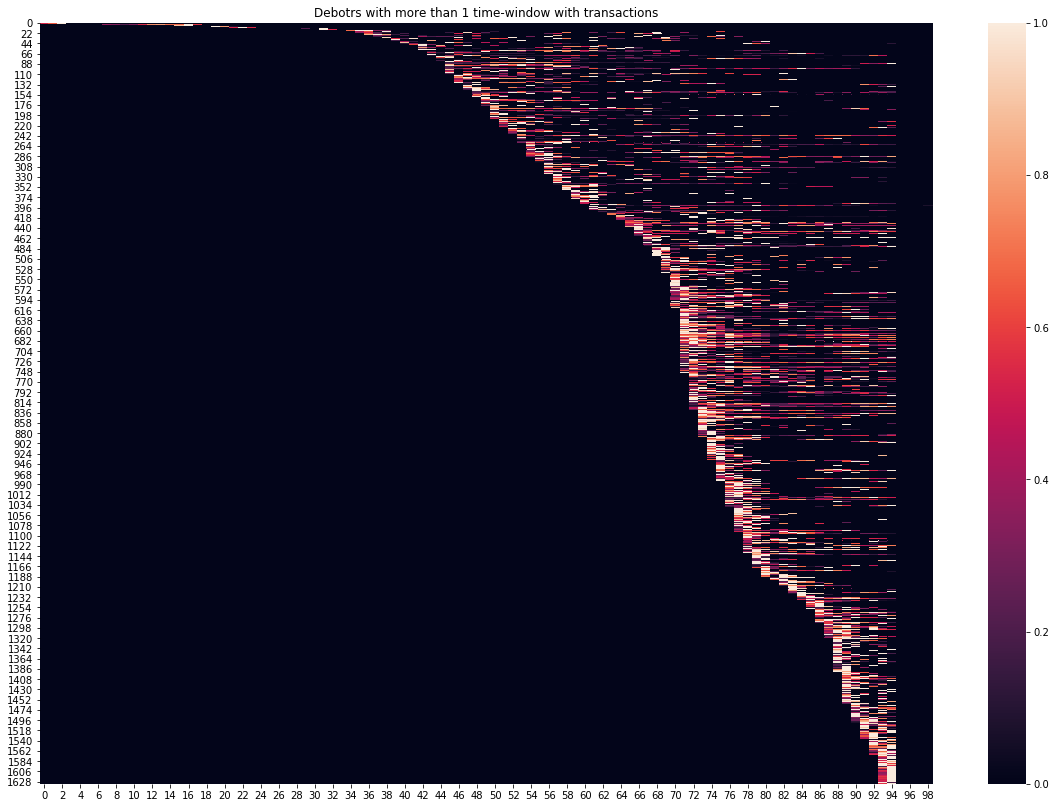

In [44]:
 plt.figure(figsize=(20,14))
sns.heatmap(flow_array[ii,:])
plt.title('Debotrs with more than 1 time-window with transactions')

## Pastdue90 transactions over time

In [46]:
df['invoice_amount_pastdue90'] = df.apply(lambda row: row['invoice_amount'] if row[pastdue_col] else 0, axis=1)

In [47]:
group_invoice_date_window_pastdue_90 = df.groupby(by=['debtor_name_1','invoice_date_window']).sum()['invoice_amount_pastdue90']

In [48]:
flow_array_pastdue_90 = np.empty([len(np.intersect1d(debtors,past_due_nodes)),len(dates_linspace)])
for debtor_key, debtor in enumerate(np.intersect1d(debtors,past_due_nodes)):
    for time_window_key, time_window in enumerate(dates_linspace):
        try:
            flow_array_pastdue_90[debtor_key, time_window_key] = group_invoice_date_window_pastdue_90.loc[debtor].loc[time_window]
        except:
            flow_array_pastdue_90[debtor_key, time_window_key] = 0

In [49]:
row_max = flow_array_pastdue_90.max(axis=1)
row_max[row_max==0]=1
flow_array_pastdue_90 = flow_array_pastdue_90 / row_max[:, np.newaxis]

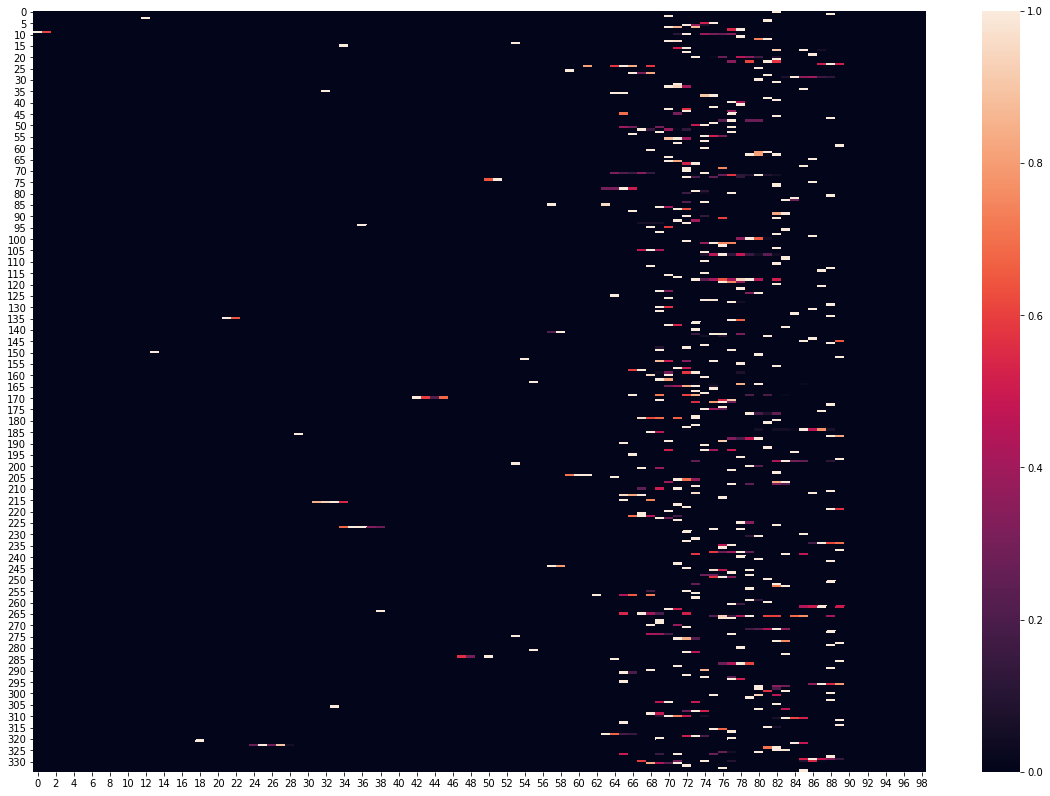

In [50]:
plt.figure(figsize=(20,14))
sns.heatmap(flow_array_pastdue_90)

## Degree in time

In [152]:
list_degree = []

In [153]:
for date_index, date in enumerate(dates_linspace[1:]):
    network = nx.from_pandas_edgelist(df[(dates_linspace[date_index] <= df.invoice_date) &
       (df.invoice_date<date)],
                            source='debtor_name_1',
                            target='customer_name_1',
                            edge_attr=edge_attr,
                            create_using=nx.MultiDiGraph)
    for node in giant_component.nodes:
        list_degree.append({'degree':network.out_degree(node) if network.has_node(node) else 0,
                           'date':date})

In [154]:
df_degree = pd.DataFrame.from_records(list_degree)

In [155]:
df_degree_clean = df_degree[df_degree.date.isin(df.invoice_date_window)]

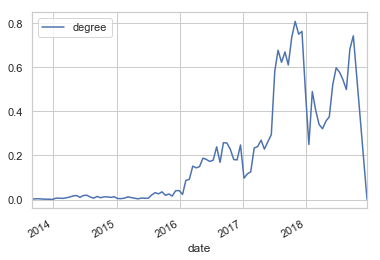

In [156]:
df_degree_clean.groupby('date').mean().plot()

C:\ProgramData\Anaconda3\envs\thesis_mlflow\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


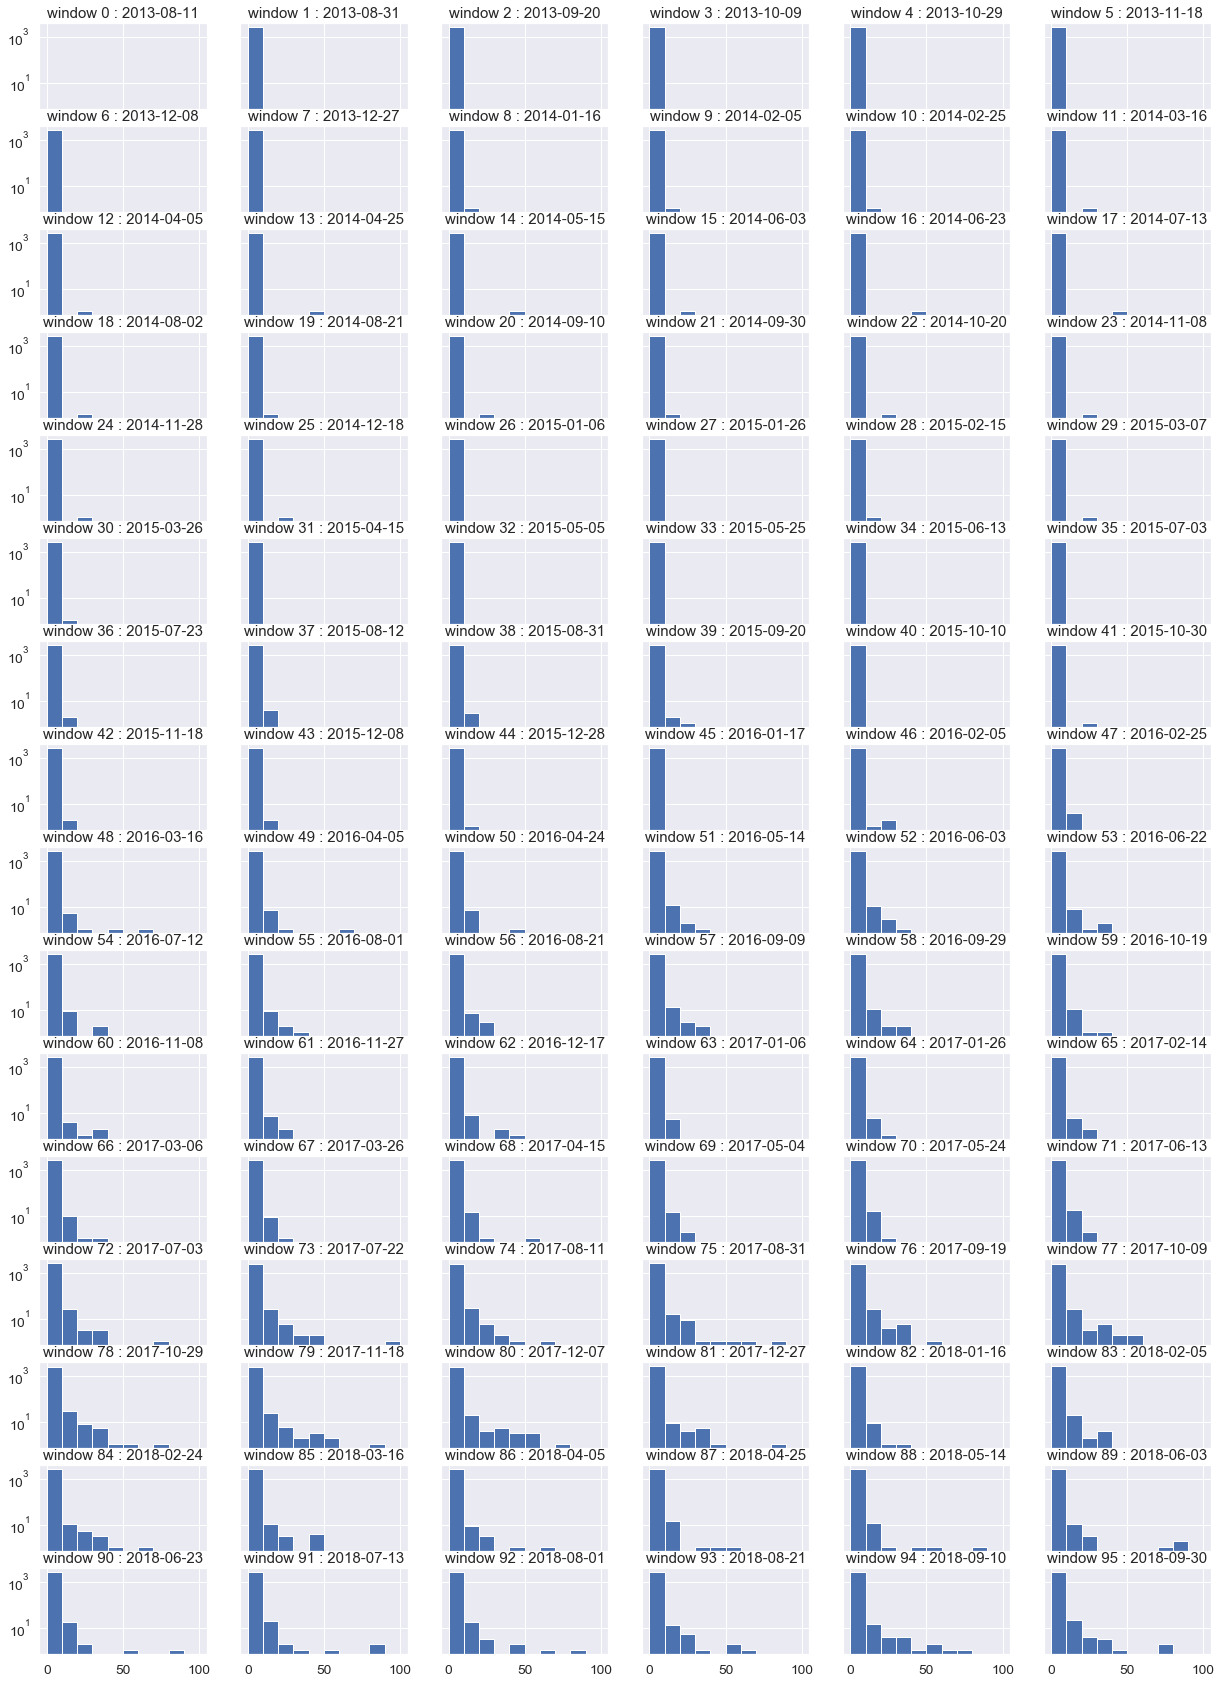

In [199]:
sns.set(font_scale=1.25)
rows=16
cols=6

fig,ax = plt.subplots(rows, cols, figsize=(21,30), sharex=True, sharey=True)
# axes are in a two-dimensional array, indexed by [row, col]
count=0
for i in range(rows):
    for j in range(cols):
        ax[i, j].hist(df_degree_clean[df_degree_clean.date==dates_linspace[count]].degree, bins=10, log=True, range=(0,100)) #, title=(str(dates_linspace[count])
        ax[i, j].set_title("window {} : ".format(count)+str(dates_linspace[count]).split(' ')[0])
        count+=1
plt.savefig('degree_dist_grid', bbox_inches='tight')
#fig.suptitle("Time window degree distribution from 2013 to 2018")

In [168]:
#for date in dates_linspace:
#    plt.figure(figsize=(5,2))
#    df_degree_clean[df_degree_clean.date==date]['degree'].hist(bins=10, log=True)
#    plt.title(date)
#    plt.show()

In [56]:
print("Again non-stationarity in network flows distribution; saturated time-windows with power-law like distribution")

Again non-stationarity in network flows distribution; saturated time-windows with power-law like distribution


In [127]:
 df_degree_gr = df_degree.groupby('date').agg([('max',max),
                              ('average',np.mean),
                              ('std',np.std),
                              ('count',lambda value: sum(value>0))])

In [128]:
df_degree_gr = df_degree_gr.reset_index()

In [129]:
list_degree_gr = []
for row in df_degree_gr.itertuples():
    list_degree_gr.append({'date':row[1],
                          'max':row[2],
                          'average':row[3],
                          'std':row[4],
                          'count':row[5]})
df_degree_gr_new = pd.DataFrame.from_records(list_degree_gr)
df_degree_gr_new = df_degree_gr_new[['date','max','average','std','count']]

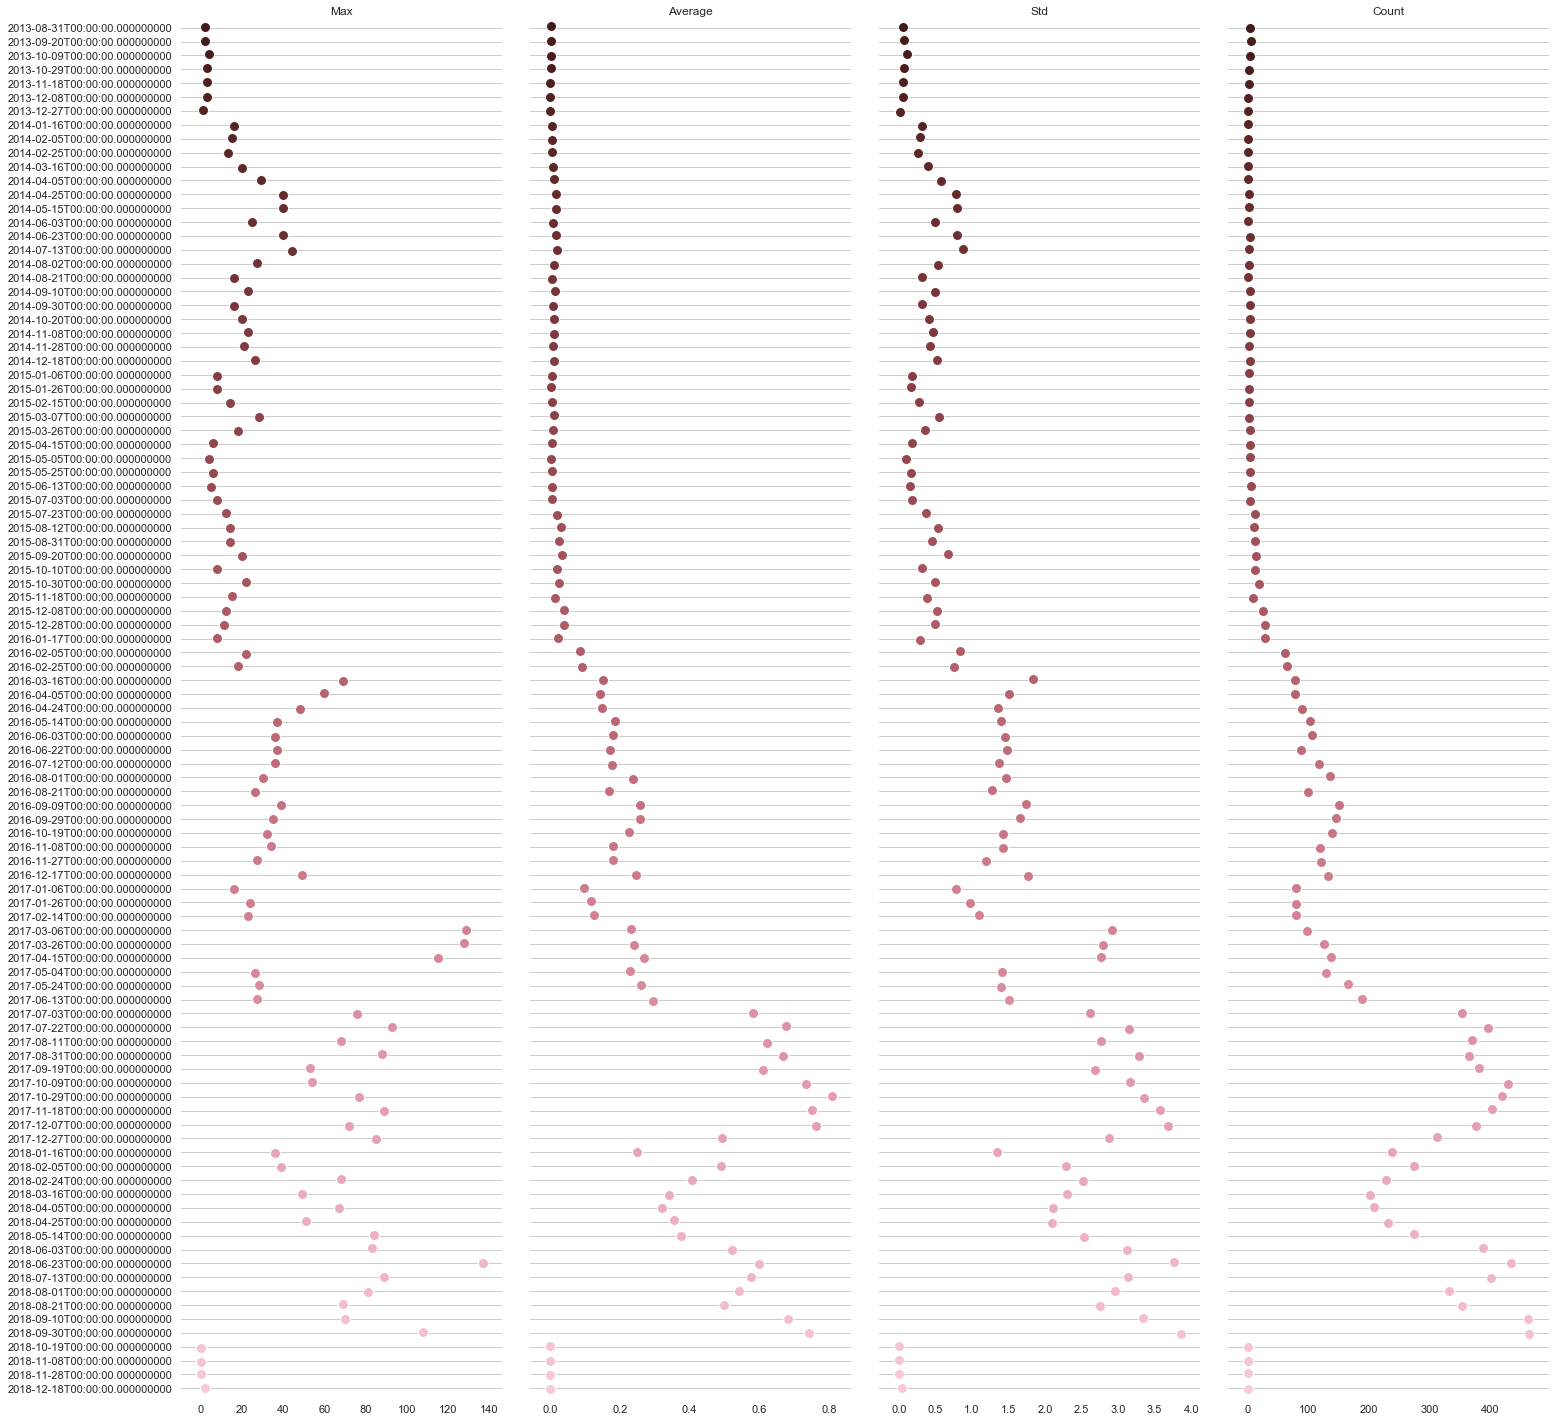

In [203]:
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(df_degree_gr_new,
                 x_vars=df_degree_gr_new.columns[1:], y_vars=["date"],
                 height=20, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Max",
         "Average",
         "Std",
         'Count']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

g.savefig('degree_overtime')